In [1]:
import pandas as pd
import pickle
import datetime

In [2]:
import sys
sys.path.insert(0, './utils/')

import ml_pipeline as mp

In [3]:
import importlib
importlib.reload(mp)

<module 'ml_pipeline' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\ml_pipeline.py'>

In [4]:
data_path = './data/loan.csv'

df = pd.read_csv(data_path)

C:\Users\xzhou\AppData\Local\Temp\ipykernel_8968\1420088683.py:3: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
df.shape

(887379, 74)

In [6]:
# Assign labels based on loan status

excluded = {'Issued', 'Does not meet the credit policy. Status:Charged Off',
            'Does not meet the credit policy. Status:Fully Paid'}
positive = {'Current', 'Fully Paid'}
negative = {'Charged Off', 'Default', 'In Grace Period', 
       'Late (16-30 days)', 'Late (31-120 days)'}

def assign_label(status):
    """
    Classify loan staus based on description
    """
    try: 
        status=status.strip()
        if status in positive:
            return "positive"
        elif status in negative:
            return "negative"
        else: 
            return "excluded"
    except: 
        return "excluded"

In [7]:
df['label'] = df['loan_status'].apply(lambda x: assign_label(x))

In [8]:
# Drop ids, and loan status to prevent info leakage
cols_to_drop = ['id', 'member_id', 'loan_status']
df_id_removal = df.drop(columns = cols_to_drop)

In [9]:
# Only keep loans with good or bad status
df_label = df_id_removal[df_id_removal['label']!='excluded']
df_label.label.unique()

array(['positive', 'negative'], dtype=object)

In [10]:
model = mp.MLPipeline(df_label)

In [11]:
df_processed = model.preprocess_data()

INFO:root:Label encoding: {'positive': 0, 'negative': 1}
INFO:root:Dropped columns with missing values above the threshold
INFO:root:Processed date columns
INFO:root:Handled missing values for numerical columns
INFO:root:Handled extreme values for numerical columns
INFO:root:Created dummy variables for categorical columns
INFO:root:Handled high correlation among numerical columns
INFO:root:Standardized numerical columns
INFO:root:Cleaned feature names for XGBoost


In [12]:
top_features = model.select_features(n_samples=50000)

INFO:root:Starting feature selection...
INFO:root:Feature selection completed in 489.03 seconds


In [13]:
top_features 

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'sub_grade_A4',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E5',
 'sub_grade_F2',
 'sub_grade_F5',
 'sub_grade_G2',
 'sub_grade_G5',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'emp_length_10+ ye

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 0.89 seconds)
KNN: Done (Execution Time: 0.03 seconds)
SVM: Done (Execution Time: 2074.06 seconds)
Random Forest: Done (Execution Time: 23.31 seconds)
XGBoost: Done (Execution Time: 7.72 seconds)


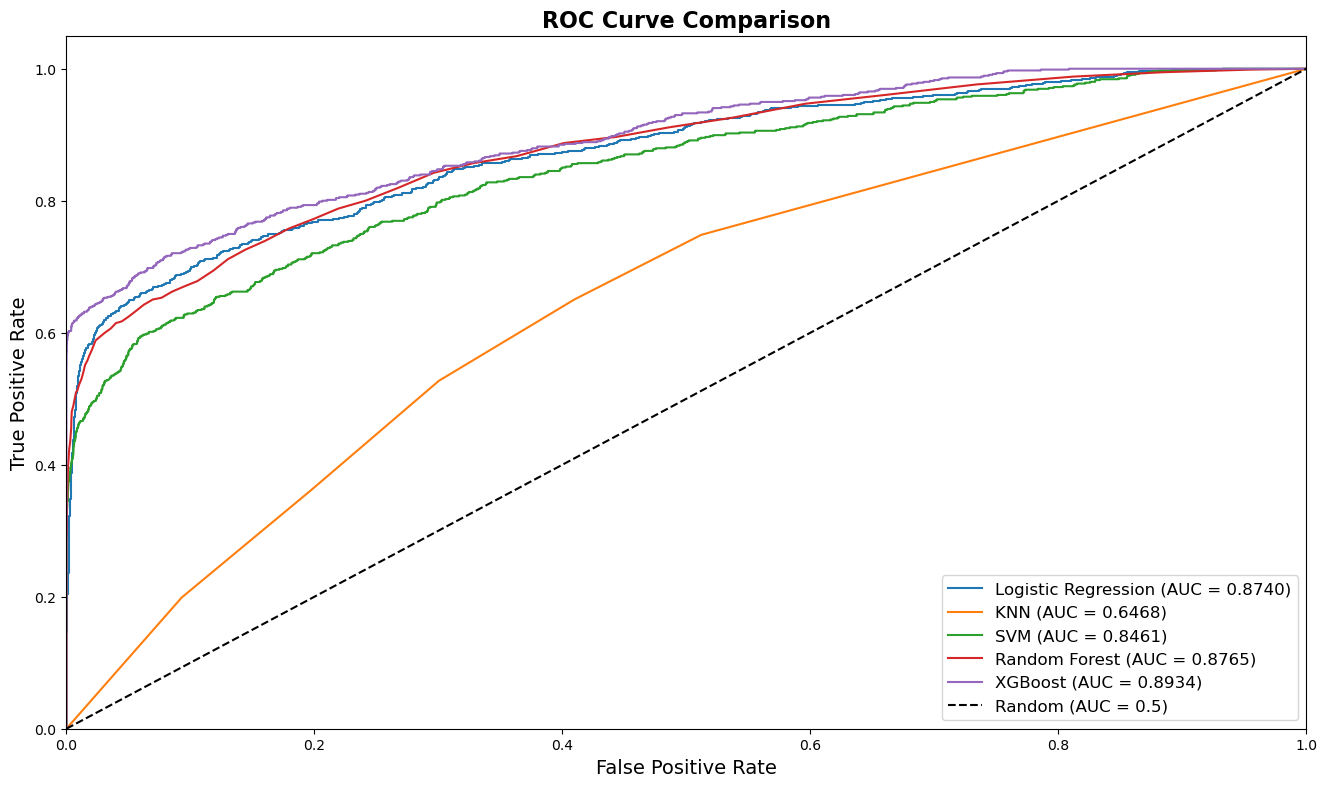

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression    0.8992   0.400628  0.675497  0.502959  0.874041
1                  KNN    0.6866   0.125354  0.527152  0.202545  0.646757
2                  SVM    0.9383   0.609524  0.508609  0.554513  0.846056
3        Random Forest    0.9549   0.913043  0.445033  0.598397  0.876527
4              XGBoost    0.9686   0.980392  0.596026  0.741351  0.893351

Best Performing Model:

Model         XGBoost
Accuracy       0.9686
Precision    0.980392
Recall       0.596026
F1 Score     0.741351
ROC AUC      0.893351
Name: 4, dtype: object

Best Performing Model:

Model         XGBoost
Accuracy       0.9686
Precision    0.980392
Recall       0.596026
F1 Score     0.741351
ROC AUC      0.893351
Name: 4, dtype: object

Saved best model (XGBoost) to a pickle file.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [14]:
model.run_classification_models(n_samples=50000, scoring_metric='f1 score' )

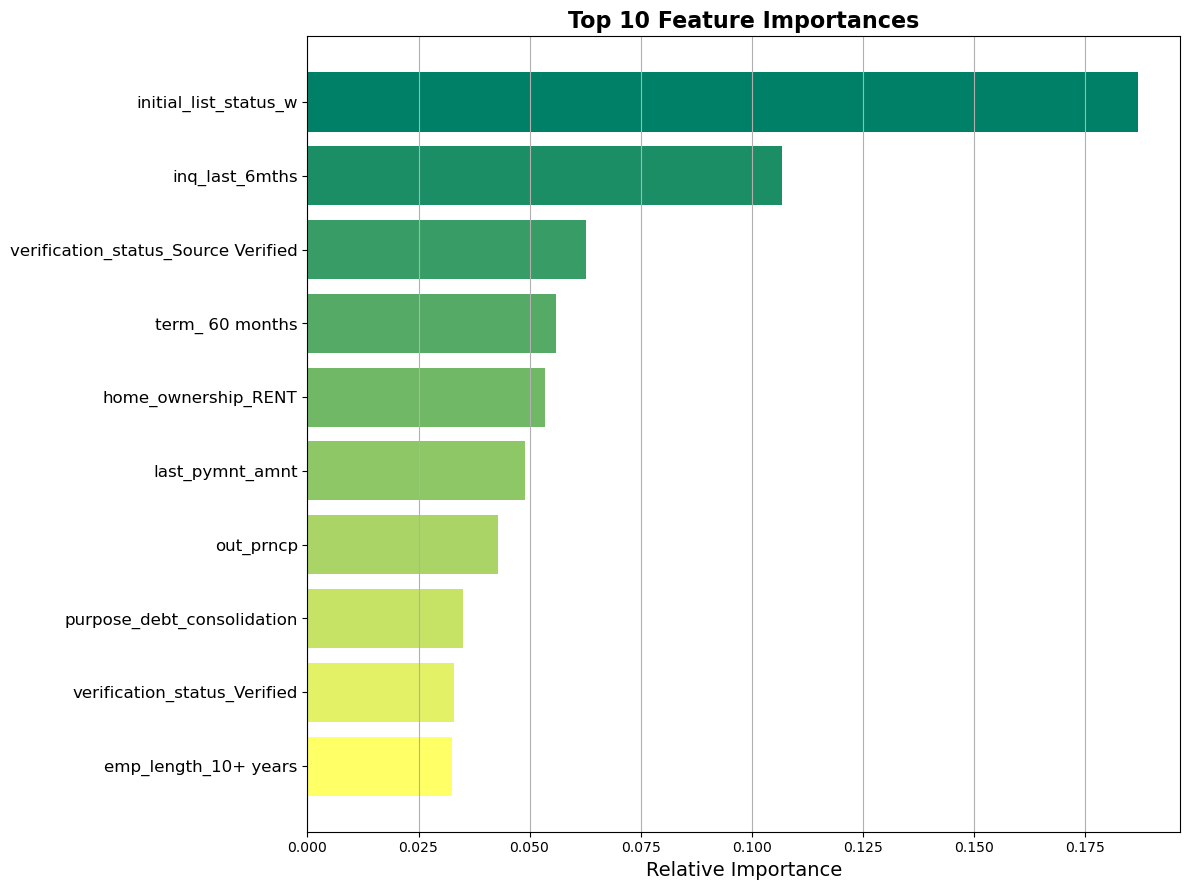

{'initial_list_status_w': 0.18708907,
 'inq_last_6mths': 0.10680809,
 'verification_status_Source Verified': 0.06281584,
 'term_ 60 months': 0.055880815,
 'home_ownership_RENT': 0.053378794,
 'last_pymnt_amnt': 0.048917584,
 'out_prncp': 0.042920854,
 'purpose_debt_consolidation': 0.035126116,
 'verification_status_Verified': 0.03309635,
 'emp_length_10+ years': 0.03255922}

In [15]:
model.plot_top_n_features()